For the case of single state, probability of observing the state $k'$ is given as follows// 

$$ P(k')= \frac {1}{2^{2t}} \left | \left[\frac{1- \left[e^{\left(\frac{-2 \pi i}{2^t}(k'- \phi 2^{t})\right)}\right]^{2^t}}{1- \left[e^{\left(-
\frac{2 \pi i}{2^t}(k'- \phi 2^{t})\right)}\right]}\right]\right |^{2} $$ 

Clearly the probability is peaked when $k'\approx \phi 2^{t}$. Hence we do not have an exact estimate of $\phi$, but an approximate estimate.

Terms: 
$t$ = estimation register size ; $k' = 0$ to $2^t-1$ ; $ 0 < \phi < 2\pi $

We can further simplify the above expression by expression $e^{i\phi}= cos(\phi)+isin(\phi)$ and thereby using the $|x+iy|= x^{2}+ y^{2}$ The simplified expression looks like,
$${P}(k') = \frac{1}{M^2}\left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(k'- \frac{\phi M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(k'- \frac{\phi M}{2\pi}\right)\right)}}\right)$$

This value of probability peaks at $k' = 2\pi(\frac{k}{2^t})$. Here $M= 2^t$

In [1]:
# Function defining the above probability expression

def P(t, phi, k):   
    import numpy as np
    M=2**t
    nr = 1 - np.cos((2*np.pi)*(k - phi*M/(2*np.pi)))
    dr = 1 - np.cos((2*np.pi/M)*(k - phi*M/(2*np.pi)))
    return nr/(dr*M**2)

C:\Users\viraj.dsouza\AppData\Local\Temp\ipykernel_1688\3939704415.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return nr/(dr*M**2)


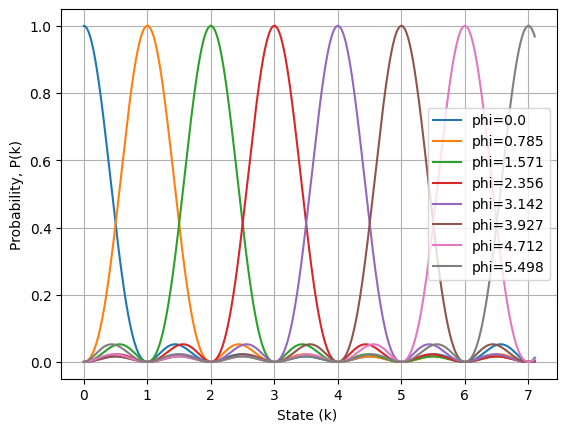

In [2]:
#plotting for basic case

import numpy as np
import matplotlib.pyplot as plt
t=3  #this is what we set, in QPE circuit greater the value of t, greater is the precision of phase we observe
phi = np.arange(0, 2*np.pi, np.pi/4)
k=np.arange(0,7.1,0.001) 

for j in range(len(phi)):
    x=[]
    for i in range(len(k)):
        x.append(P(t, phi[j], k[i]))
    plt.plot(k, x, label= 'phi={0}'.format(round(phi[j],3)))
    
plt.grid()
plt.xlabel("State (k) ")
plt.ylabel("Probability, P(k)")
plt.legend()
plt.show()

Let's focus on the orange curve. Here the peak is observed for the state $k=1$ which implies that phase is $\phi = 2\pi \frac{k}{2^t}= 6.28 (\frac{1}{2^3})= 0.785$ which is as required. The following is the plot with the orange curve alone.


C:\Users\viraj.dsouza\AppData\Local\Temp\ipykernel_1688\3939704415.py:8: RuntimeWarning: invalid value encountered in double_scalars
  return nr/(dr*M**2)


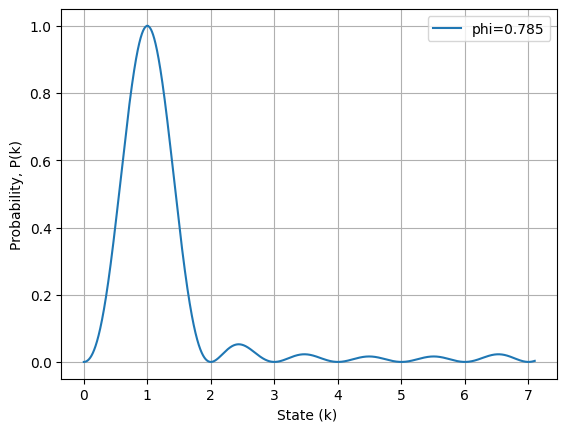

In [5]:
import numpy as np
import matplotlib.pyplot as plt
t=3
phi = np.arange(0, 2*np.pi, np.pi/4)
k=np.arange(0,7.1,0.001) 


x=[]
for i in range(len(k)):
    x.append(P(t, phi[1], k[i]))
plt.plot(k, x, label= 'phi={0}'.format(round(phi[1],3)))
    
plt.grid()
plt.xlabel("State (k) ")
plt.ylabel("Probability, P(k)")
plt.legend()
plt.show()

For the case of superposition state, probability of observing state $k'$ is given by
$$Pr(k') = \frac{1}{M^2}\sum_{k'}a_{k'} {^2} \left(\frac{1-\cos{\left(\frac{2 \pi M}{M}\left(k'- \frac{\phi_{k'} M}{2\pi}\right)\right)}}{1-\cos{\left(\frac{2 \pi }{M}\left(k' - \frac{\phi_{k'} M}{2\pi}\right)\right)}}\right)$$
The probability peaks at those $k'$ for which, $k' \approx \frac{\phi_{k'} M}{2\pi}$.

In [8]:
def P(t, k, a_k, phi):          
    list=[]                     
    import numpy as np
    M=2**t
    for k in range(len(a_k)):
        nr = 1 - np.cos((2*np.pi)*(k - phi[k]*M/(2*np.pi)))
        dr = 1 - np.cos((2*np.pi/M)*(k - phi[k]*M/(2*np.pi)))
        term = (a_k[k]**2)*(nr/dr)
        list.append(term/M**2)
            
    return sum(list), list 


Consider a superposition state given by $\psi= \frac{1}{\sqrt{3}}\psi_1+ \frac{2}{\sqrt{3}}\psi_2$
Let's say when a unitary operator $U$ acts on this state, then since $U$ is linear it acts individually on $\psi_1$ and $\psi_2$ and let's say $\phi_1$ and $\phi_2$ are the corresponding phases that are produced due the action of $U$. 

C:\Users\viraj.dsouza\AppData\Local\Temp\ipykernel_1688\4015410574.py:9: RuntimeWarning: invalid value encountered in double_scalars
  term = (a_k[k]**2)*(nr/dr)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


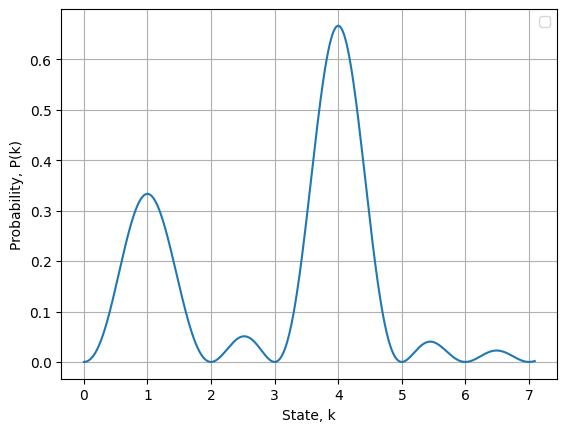

In [21]:
import numpy as np
t=3
a_k = [1/np.sqrt(3), np.sqrt(2/3)] 
k=np.arange(0,7.1,0.01)

y=[]

for j in range(len(k)):
    y.append(Pr(t, k[j], a_k, [np.pi/4 , np.pi])[0])
plt.plot(k,y)
    
plt.grid()
plt.xlabel("State, k")
plt.ylabel("Probability, P(k)")
plt.legend()
plt.show()

Note that in this curve, the $y$ value $P(k)$ is the value obtained after doing the necessary summation. This is because the function definition of the probability returns a sum too. 
From this, there is no good way to deduce the phase corresponding to each eigenstate in the superposition.  